In [193]:
import pylab
import numpy as np
%pylab inline
from halotools.empirical_models import Zheng07
from astropy.table import Table


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [194]:
model = Zheng07(threshold = -21)
data = np.loadtxt("richness.dat")
model.param_dict

{'alpha': 1.15,
 'logM0': 11.92,
 'logM1': 13.94,
 'logMmin': 12.79,
 'sigma_logM': 0.39}

In [195]:
def richness(group_id):
    gals = Table()
    gals['groupid'] = group_id
    gals['dummy'] = 1
    grouped_table = gals.group_by('groupid')
    grp_richness = grouped_table['dummy'].groups.aggregate(np.sum)
    return grp_richness

In [232]:
model2 = Zheng07(threshold=-21)
model2.param_dict["logM0"] = 12.1

In [233]:
model.populate_mock()
model2.populate_mock()

In [234]:
g2 = model2.mock.compute_fof_group_ids()
g1 = model.mock.compute_fof_group_ids()

In [267]:
bins = np.arange(1,61,1)
print bins

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53 54 55 56 57 58 59 60]


In [220]:
np.histogram(data,bins)
#np.histogram(data,bins)

(array([5830, 1542,  560,  253,  135,   73,   44,   37,   18,   18,   13,
           9,    3,    4,    4,    3,    3,    2,    1,    2,    2,    1,
           1,    0,    0,    0,    1,    1,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60]))

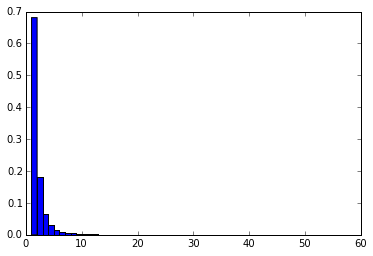

In [221]:
x = plt.hist(data , bins , normed="True")[0]


(59,)


(array([  6.81074766e-01,   1.80140187e-01,   6.54205607e-02,
          2.95560748e-02,   1.57710280e-02,   8.52803738e-03,
          5.14018692e-03,   4.32242991e-03,   2.10280374e-03,
          2.10280374e-03,   1.51869159e-03,   1.05140187e-03,
          3.50467290e-04,   4.67289720e-04,   4.67289720e-04,
          3.50467290e-04,   3.50467290e-04,   2.33644860e-04,
          1.16822430e-04,   2.33644860e-04,   2.33644860e-04,
          1.16822430e-04,   1.16822430e-04,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.16822430e-04,
          1.16822430e-04,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

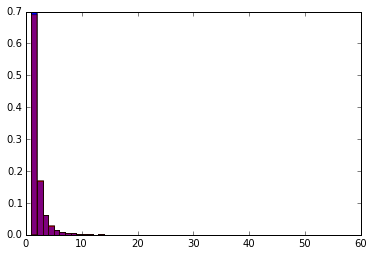

In [269]:
y = np.histogram(richness(g2),bins , normed="True")[0]
yy = plt.hist(richness(g2),bins , normed="True")[0]
print yy.shape
z = plt.hist(richness(g1),bins , normed="True" , color = "r" , alpha = .5)[0]
np.histogram(data,bins,normed="True")

In [238]:
print np.sum((x-y)**2.)
print np.sum((x-z)**2.)

8.22140483627e-05
1.12330116303e-05


In [264]:
list_r = []
model = Zheng07(threshold = -21)
for i in xrange(100):
    model.populate_mock()
    gid = model.mock.compute_fof_group_ids()
    x = np.histogram(richness(gid),bins , normed="True")[0]
    list_r.append(x)
    

(100, 59)


<matplotlib.colorbar.Colorbar instance at 0x7fb6fd3df1b8>

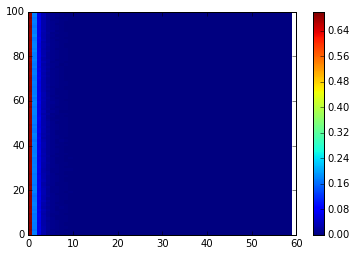

In [270]:
d_r = np.array(list_r)
print d_r.shape
plt.pcolor(d_r)
plt.colorbar()

In [271]:
d_r.shape

(100, 59)

<matplotlib.colorbar.Colorbar instance at 0x7fb6fd688200>

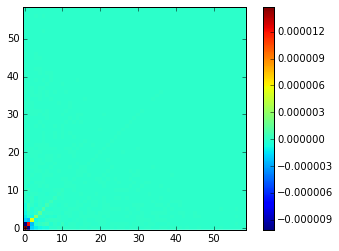

In [272]:
plt.imshow(np.cov(d_r.T), interpolation = "None" , origin = "lower")
plt.colorbar()
#plt.hist(np.mean(d_r,axis=0) , bins)

In [273]:
C_diag =  np.diag(np.cov(d_r.T))+1.e-11

In [292]:
np.sum(((np.mean(d_r,axis=0)-y)**2./C_diag)[10:])

54.85047045868302

In [291]:
np.sum(((np.mean(d_r,axis=0)-z)**2./C_diag)[10:])

48.568792671390725

In [276]:
data_richness = np.mean(d_r,axis=0)

In [277]:
variance = C_diag
variance.shape , data_richness.shape

((59,), (59,))

In [278]:
covariance = np.cov(d_r.T)

In [279]:
np.savetxt("data_richness.dat" , data_richness)

In [280]:
np.savetxt("covariance_richness.dat" , covariance)

In [281]:
np.savetxt("variance_richness.dat" , variance)

In [285]:
data_richness.shape
variance.shape

(59,)

In [293]:
xr = np.loadtxt("xir.dat")

In [295]:
print xr.shape

(500, 14)


<matplotlib.colorbar.Colorbar instance at 0x7fb6f98c8b48>

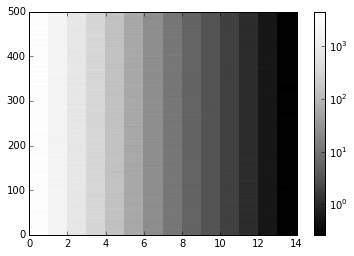

In [373]:
from matplotlib.colors import LogNorm
pylab.pcolor(xr , norm = LogNorm() , cmap = pylab.cm.Greys_r)
pylab.colorbar()

In [301]:
zhengerror = np.array([3.46285183e+03, 1.64749125e+03, 7.80527281e+02,
                      3.30492728e+02, 1.38927882e+02, 5.91026616e+01,
                      2.45091664e+01, 1.10830722e+01, 5.76577829e+00,
                      3.14415063e+00, 1.88664838e+00, 1.07786531e+00,
                      5.54622962e-01, 2.87849970e-01])


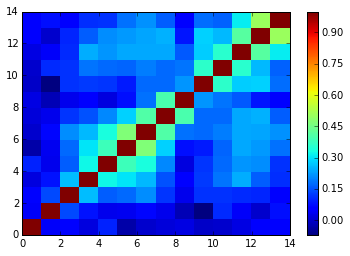

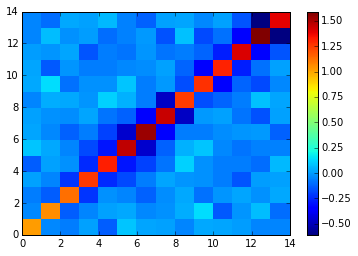

In [400]:
covariance = np.corrcoef(xr.T , bias = 1)
pylab.pcolor(covariance)
pylab.colorbar()
pylab.show()
icov = np.linalg.inv(covariance)
pylab.pcolor(icov)
pylab.colorbar()
pylab.show()
err = np.diag(icov)

In [316]:
m = Zheng07(threshold = -21)

In [319]:
m.param_dict["alpha"] = 2.

In [320]:
m.populate_mock()

In [321]:
r , x = m.mock.compute_galaxy_clustering()
rr , xx = model.mock.compute_galaxy_clustering()

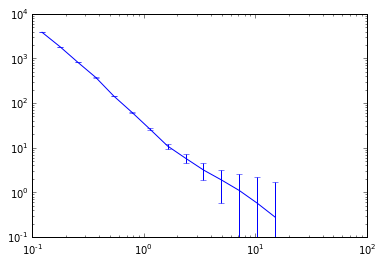

In [401]:
#pylab.loglog(r , x)
pylab.errorbar(rr , xx , yerr = err)
pylab.yscale("log")
pylab.xscale("log")

In [315]:
model.param_dict

{'alpha': 1.15,
 'logM0': 11.92,
 'logM1': 13.94,
 'logMmin': 12.79,
 'sigma_logM': 0.39}

In [362]:
m = np.logspace(11,16, 100)
from scipy.special import erf

In [363]:
def mean_central(M):
    logMmin = model.param_dict["logMmin"]
    sigma = model.param_dict["sigma_logM"]
    return .5 * (1. + erf((np.log10(M) - logMmin)/(sigma)))

In [364]:
def mean_satelite(M):
    ncen  = mean_central(M)
    M0 = 10. ** model.param_dict["logM0"]
    M1 = 10. ** model.param_dict["logM1"]
    alpha = model.param_dict["alpha"]
    return ncen * ((M - M0)/(M1)) ** alpha

(1e-06, 10000000000)

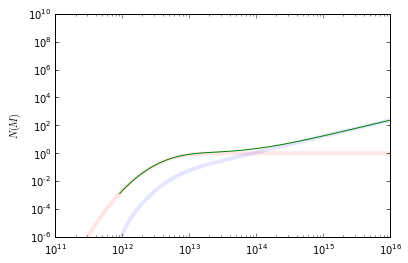

In [372]:
pylab.loglog(m , mean_central(m) , "r" , alpha = .1 , lw = 4.)
pylab.loglog(m , mean_satelite(m) , "b" , alpha = .1 , lw = 4.)
pylab.loglog(m , mean_central(m) + mean_satelite(m) , "g" , alpha = 1.)
pylab.ylabel("$N(M)$")
pylab.ylim((10**-6 , 10**10))

In [351]:
print model.param_dict["logM0"]

11.92
